In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [8]:
data=pd.read_csv('C:/Users/Admin/Downloads/Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [9]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (2200, 8)


In [11]:
data.head(11)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [12]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
data["label"].value_counts()


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [15]:
print("Average ratio of Nitrogen in Soil:{0: .2f}".format(data["N"].mean()))
print("Average ratio of Phosphorus in Soil:{0: .2f}".format(data["P"].mean()))
print("Average ratio of Potassium in Soil:{0: .2f}".format(data["K"].mean()))
print("Average ratio of Temperature in celcius:{0: .2f}".format(data["temperature"].mean()))
print("Average relative humdity in %:{0: .2f}".format(data["humidity"].mean()))
print("Average pH value of the Soil:{0: .2f}".format(data["ph"].mean()))
print("Average rainfall in mm:{0: .2f}".format(data["rainfall"].mean()))

Average ratio of Nitrogen in Soil: 50.55
Average ratio of Phosphorus in Soil: 53.36
Average ratio of Potassium in Soil: 48.15
Average ratio of Temperature in celcius: 25.62
Average relative humdity in %: 71.48
Average pH value of the Soil: 6.47
Average rainfall in mm: 103.46


In [24]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['N'].min())
    print("Average Nitrogen required:", x['N'].mean())
    print("Maximum Nitrogen required:", x['N'].max())
    print("---------------------------------------------")
    print("Statistics for Phosphorus")
    print("Minimum Phosphorus required:", x['P'].min())
    print("Average Phosphorus required:", x['P'].mean())
    print("Maximum Phosphorus required:", x['P'].max())
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required:", x['K'].min())
    print("Average Potassium required:", x['K'].mean())
    print("Maximum Potassium required:", x['K'].max())
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required: {:.2f}".format(x['temperature'].min()))
    print("Average Temperature required: {:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required: {:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required: {:.2f}".format(x['humidity'].min()))
    print("Average Humidity required: {:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required: {:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for pH")
    print("Minimum pH required: {:.2f}".format(x['ph'].min()))
    print("Average pH required: {:.2f}".format(x['ph'].mean()))
    print("Maximum pH required: {:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required: {:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required: {:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required: {:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [26]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions, "is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[(data['label'] == 'blackgrams')][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[(data['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[(data['label'] == 'apple')][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[(data['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[(data['label'] == 'watermelon')][conditions].mean()))
    print("Kidney Beans : {0:.2f}".format(data[(data['label'] == 'kidney beans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[(data['label'] == 'mung beans')][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'oranges')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[(data['label'] == 'chick peas')][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentils')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[(data['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[(data['label'] == 'moth beans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeon peas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[(data['label'] == 'mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[(data['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [27]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("-------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

## Distribution for Agricultural Conditions

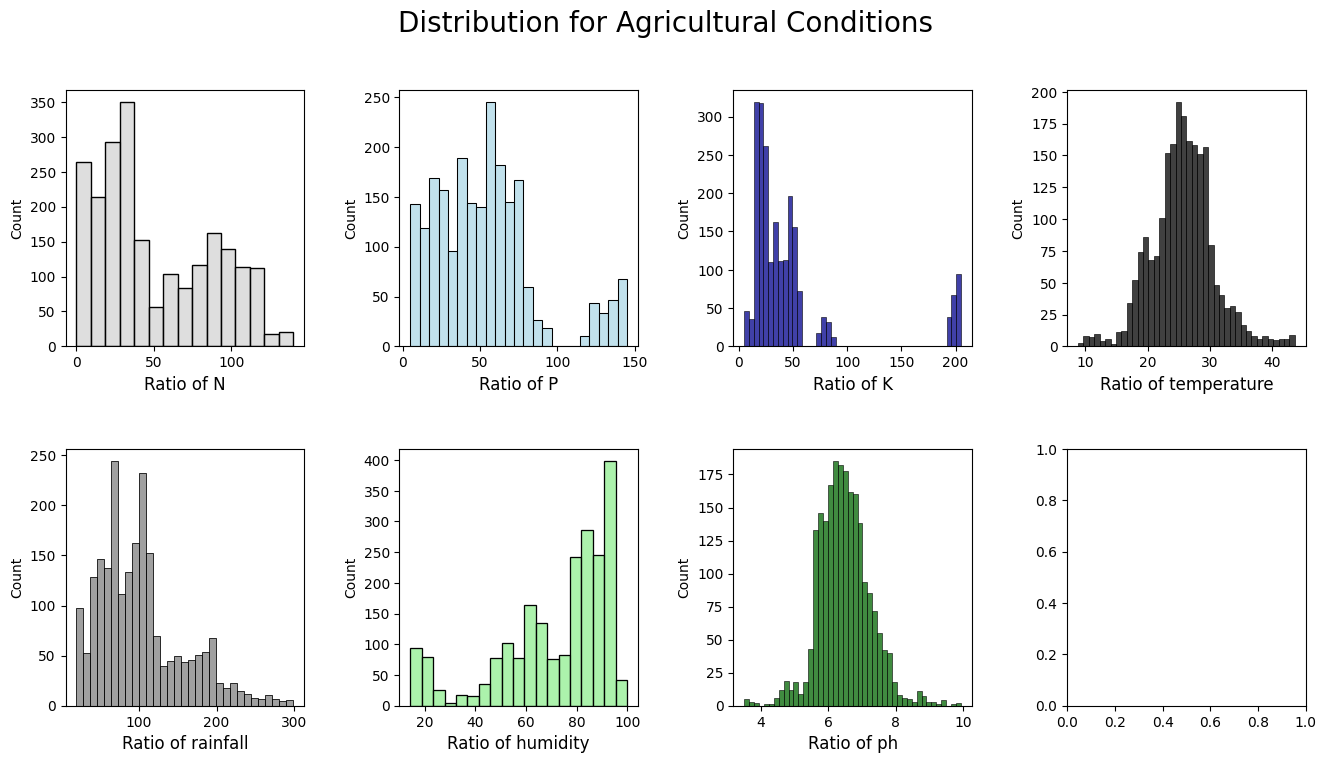

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Define the data columns and colors
columns = ['N', 'P', 'K', 'temperature', 'rainfall', 'humidity', 'ph']
colors = ['lightgrey', 'lightblue', 'darkblue', 'black', 'grey', 'lightgreen', 'darkgreen']

# Loop through the subplots and create the distribution plots
for i, col in enumerate(columns):
    row = i // 4
    col_num = i % 4
    
    sns.histplot(data[col], color=colors[i], ax=axes[row, col_num])
    axes[row, col_num].set_xlabel(f'Ratio of {col}', fontsize=12)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Add a title for the entire figure
plt.suptitle('Distribution for Agricultural Conditions', fontsize=20)

# Show the plot
plt.show()

In [92]:
print("Some Interesting Patterns")
print("--------------------------")
print("Crops which requires very High Ratio of Nirtogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature:", data[data['temperature'] > 10]['label'].unique())
print("Crops which requires very High Temperature:", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidty:", data[data['humidity'] > 20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
--------------------------
Crops which requires very High Ratio of Nirtogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Humidty: ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
Crops which requires very Low pH: ['m

## Seasonal Crops Recommendations ( Summer, Winter, Rainy)

In [93]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


## Removing of columns to find some more Insights

In [94]:
from sklearn.cluster import KMeans

# removing the labels column
x = data.drop(['label'], axis=1)

# selecting all the values of the data
x = x.values

# checking the shape
print(x.shape)

(2200, 7)


## To determine the Optimum Number of Clusters within the Dataset

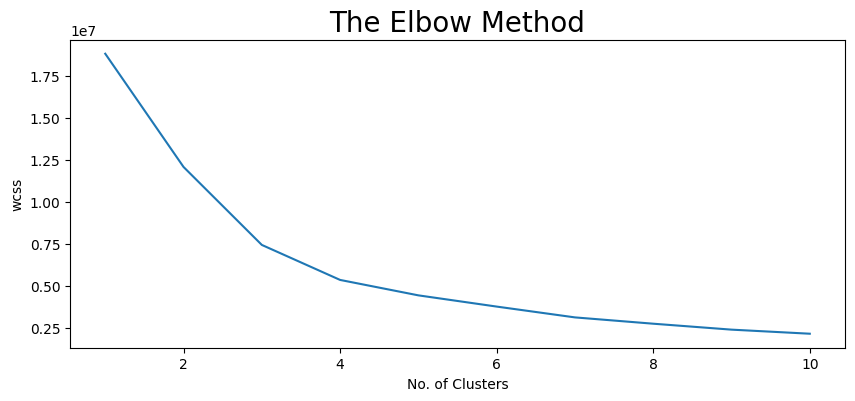

In [95]:
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
# Lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


## Implementation of K Means to perform Clustering Analysis

In [96]:
km =KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
# Lets find out the Results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# Lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First cluster:", z[z['cluster'] == 0][ 'label'].unique())
print("----------------------------------------------------------------")
print("Crops in Second cluster:", z[z['cluster'] == 1][ 'label'].unique())
print("----------------------------------------------------------------")
print("Crops in Third cluster:", z[z['cluster'] == 2][ 'label'].unique())
print("----------------------------------------------------------------")
print("Crops in Forth cluster:", z[z['cluster'] == 3][ 'label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First cluster: ['grapes' 'apple']
----------------------------------------------------------------
Crops in Second cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------------------
Crops in Third cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
----------------------------------------------------------------
Crops in Forth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


## Splitting up of the Dataset for Predictive Modelling

In [108]:
y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("shape of y:", y.shape)

Shape of x: (2200, 7)
shape of y: (2200,)


## Creations of the Training and Testing Sets for Validation of Results

In [111]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", x_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440, 7)


## Evaluation of a Model Performance

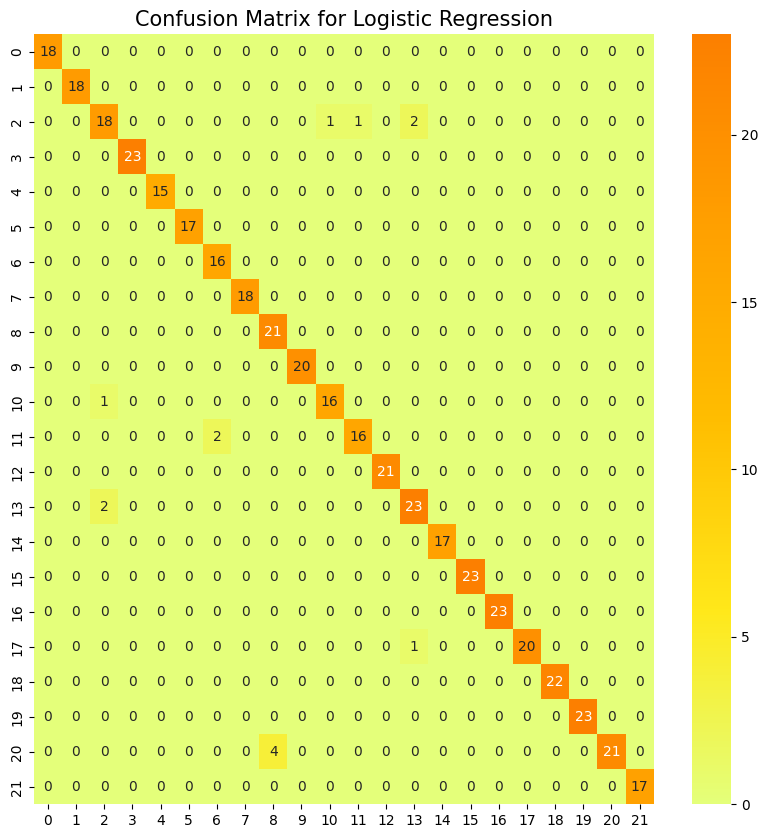

In [114]:
from sklearn.metrics import confusion_matrix

# Printing the Confusion matrix 
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

## Printing out the Classification Report


In [115]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [116]:
from sklearn.metrics import classification_report

# Assuming that we have defined and populated y_test and y_pred correctly
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

## Inspecting the Head of the Dataset

In [117]:
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## The Final Prediction

In [118]:
prediction = model.predict((np.array([[90,
                                      40,
                                      40,
                                      20,
                                      80,
                                      7,
                                     200]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
